# MNIST 
http://yann.lecun.com/exdb/mnist/

***
![MNIST Image](https://cdn-images-1.medium.com/max/1600/1*9Mjoc_J0JR294YwHGXwCeg.jpeg)
***

In [1]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
import array as arr
import os

In [2]:
# adapted from https://docs.python.org/3.7/library/gzip.html
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

In [3]:
# Display what file contents is, initially read in as byte form.
type(file_content)

bytes

In [4]:
# magic number
int.from_bytes(file_content[0:4], 'big')

2051

In [5]:
# number of images
int.from_bytes(file_content[4:8], 'big')

10000

In [6]:
# number of rows
int.from_bytes(file_content[8:12], 'big')

28

In [7]:
# number of columns
int.from_bytes(file_content[12:16], 'big')

28

In [8]:
# First Image in byte form:
file_content[16:800]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00T\xb9\x9f\x97<$\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xde\xfe\xfe\xfe\xfe\xf1\xc6\xc6\xc6\xc6\xc6\xc6\xc6\xc6\xaa4\x00\x00\x00\x00\x00\x00\x

In [9]:
# First image in integer values: 
# using the big endian: https://www.webopedia.com/TERM/B/big_endian.html
# converts from byte to int as it reads it from left to right.
# https://zippy.gfycat.com/MellowPreciousBedbug.webm

myInt = int.from_bytes(file_content[16:800], 'big')
myInt

1304463381619009948403878097089841300711354457407174500312814557509593892678552372752508130509234222930846266705489764750513419777994280323908111060119013561912104001048814645009368667210846550895082757157004821772231348809745615270877914789861397775631918628605870776481839770833493742707833970224706705693779339588369005595838703915822211432759248778903842344128075684014661189674054865673657514663284146358525583889616929416203822068866573766212767851787507257637727135147681256181120598817376606747299277151550133655760609196214659675074804555960250293811687475516241810459783906196841950751972277179168481688043987473979185149563084664262825348084796535358851127878281729914764414109320751237733787716712003349684153191121045899956915737688202671148954750617699723196625270061846018939054757177332417292060009753695038624450318282470899342170397707159338026932569009337887717630764805097919997983049534147959577299399716851331022931479646338965797192112299006866578613373996037825647537728996319

So here we take what we did above, get the first image in integer form,mthen we reshape it to a 28 by 28 array as a uint8,
saving it as a numpy array and inverting the white to black with the ~ symbol.

In [10]:
image1 = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

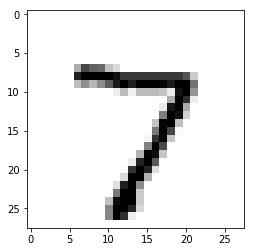

In [11]:
# using mathplot we can display the image directly in jupyter:
plt.imshow(image1, cmap='gray')

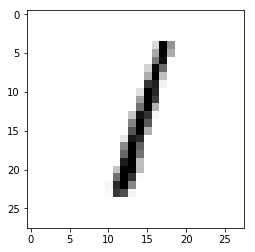

In [12]:
# Same thing here, except since we know the starting point of the next integer we can just add the value 784
# to the file content list values.
image2 = ~np.array(list(file_content[1584:2368])).reshape(28,28).astype(np.uint8)
plt.imshow(image2, cmap='gray')

Here I wanted to try and display multiple images in subplots, in doing so I created an array of images, looped over every image and saved them sequentially to the images array. 

Then after some research I found you can loop through subplots and specify the rows and columns rom here: 
https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645

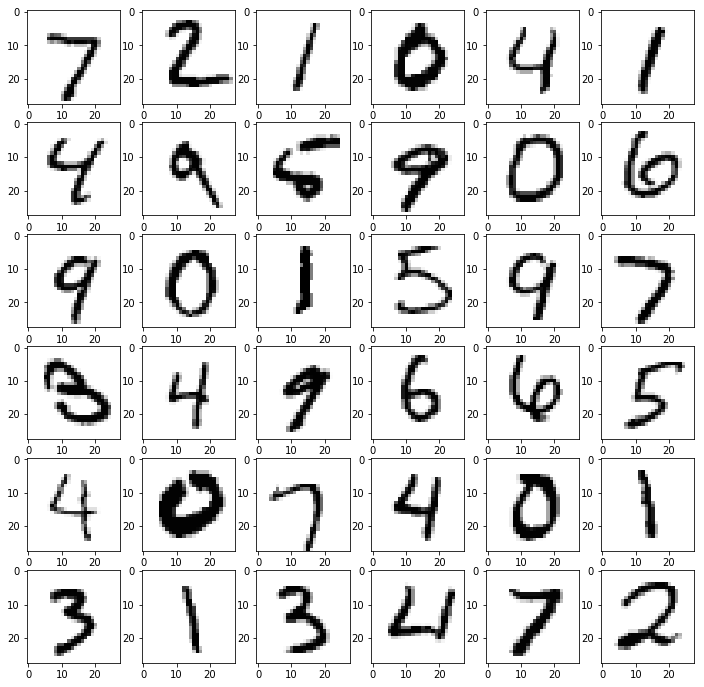

In [13]:
images = [0]
for x in range(16, 1000000, 784):
  images += [~np.array(list(file_content[x:x+784])).reshape(28,28).astype(np.uint8)]

#plt.imshow(images[2], cmap='gray')
#10000 images
w=10
h=10
fig=plt.figure(figsize=(12, 12))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    img = images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    
# plt.savefig('fig')
plt.show()

So after this I wanted to read all the images and save them in a structured folder format.
Initially I needed to get the labels so I colud do this:

In [14]:
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [15]:
# First image label number: 
int.from_bytes(labels[8:9], byteorder="big")

7

In [16]:
# get the labels
def mkDir(folderName):
    if not os.path.exists(folderName):
        os.makedirs(folderName) 
mkDir('./numbers/0')
mkDir('./numbers/1')
mkDir('./numbers/2')
mkDir('./numbers/3')
mkDir('./numbers/4')
mkDir('./numbers/5')
mkDir('./numbers/6')
mkDir('./numbers/7')
mkDir('./numbers/8')
mkDir('./numbers/9')

myLabels = []
for x in range(8, 10000, 1):
    myLabels += [int.from_bytes(labels[x:x+1], byteorder="big")]


# Saves all images as PNG to sorted folders
Warning this can take up a lot of space and can crash jupyter

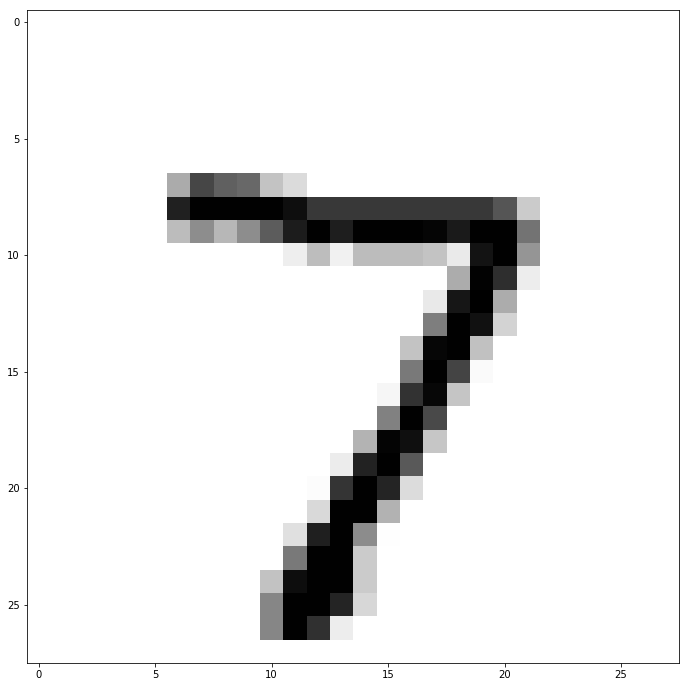

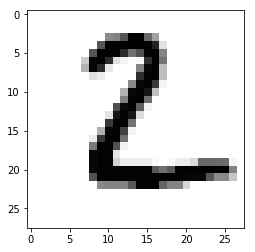

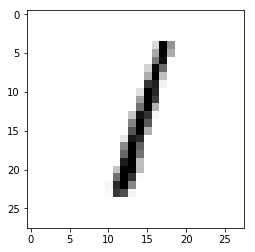

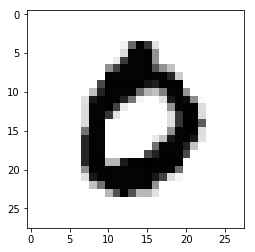

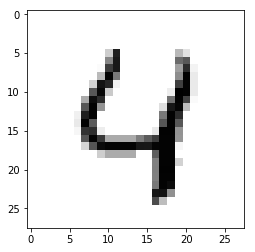

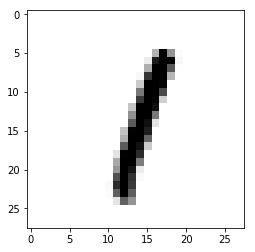

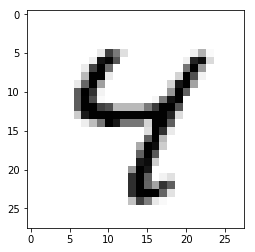

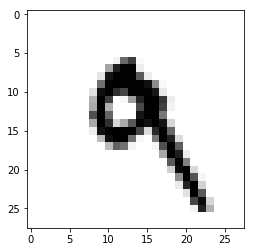

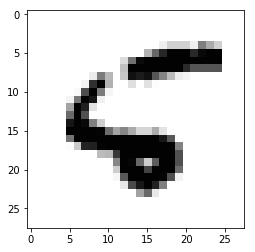

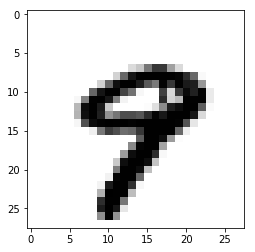

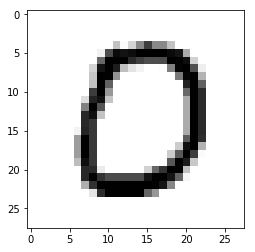

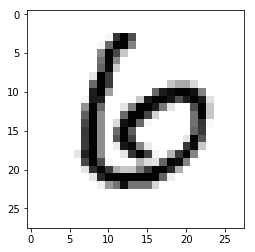

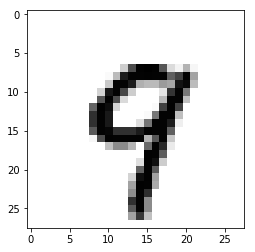

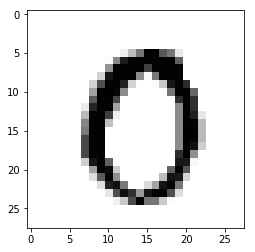

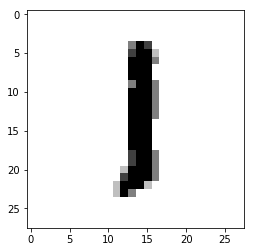

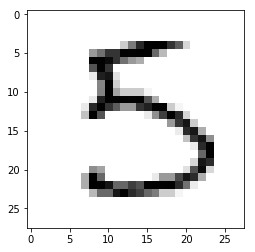

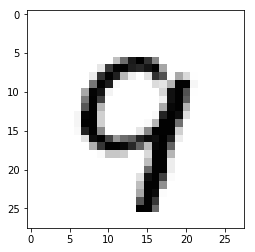

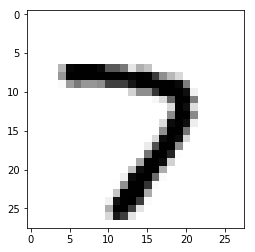

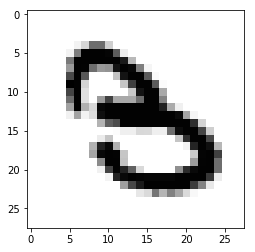

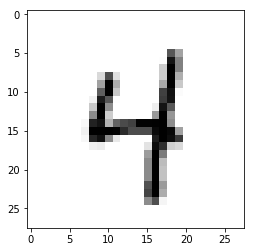

In [17]:
# saves all the images to an array called images
images = []
# if you want to save all the images change this variable to 10000:
numberOfImagesToSave = 20
for x in range(16, 7840000, 784):
  images += [~np.array(list(file_content[x:x+784])).reshape(28,28).astype(np.uint8)]

w=10
h=10
fig=plt.figure(figsize=(12, 12))

for i in range(0, numberOfImagesToSave):
    plt.imshow(images[i], cmap='gray')
    plt.savefig('./numbers/' +str(myLabels[i]) + '/' + str(i))
    plt.show()
